In [1]:
import pandas as pd
df = pd.read_csv('covidvaccine.csv')
df= df[df['text'].notnull()]
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64.0,11.0,110.0,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App,False
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1.0,17.0,0.0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143.0,566.0,8.0,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\n...,NaN,Twitter Web App,False
3,Zane,NaN,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,False,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco...,NaN,Twitter for Android,False
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83.0,497.0,10737.0,False,18-08-2020 12:45,@michellegrattan @ConversationEDU This is what...,NaN,Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381668,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,38.0,0,0,False,2022-04-04 02:00:06,45+ #RURAL #Bengaluru #CovidVaccine Availabili...,"['RURAL', 'Bengaluru', 'CovidVaccine']",VaxBlr,False
381669,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,38.0,0,0,False,2022-04-04 01:30:27,18-44 #BBMP #Bengaluru #CovidVaccine Availabil...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",VaxBlr,False
381670,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,38.0,0,0,False,2022-04-04 01:30:17,18-44 #URBAN #Bengaluru #CovidVaccine Availabi...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,False
381671,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,38.0,0,0,False,2022-04-04 01:30:06,18-44 #RURAL #Bengaluru #CovidVaccine Availabi...,"['RURAL', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,False


In [2]:
use_cols = ['text', 'date', 'user_followers']
drop_cols =list(filter(lambda x: x!=None, [col if not col in use_cols else None for col in df.columns]))
print(drop_cols)

import nltk

data = df[df.columns.drop(drop_cols)]
data

['user_name', 'user_location', 'user_description', 'user_created', 'user_friends', 'user_favourites', 'user_verified', 'hashtags', 'source', 'is_retweet']


,user_followers,date,text
0,64.0,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...
1,1.0,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...
2,143.0,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\n...
3,29.0,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco...
4,83.0,18-08-2020 12:45,@michellegrattan @ConversationEDU This is what...
...,...,...,...
381668,38.0,2022-04-04 02:00:06,45+ #RURAL #Bengaluru #CovidVaccine Availabili...
381669,38.0,2022-04-04 01:30:27,18-44 #BBMP #Bengaluru #CovidVaccine Availabil...
381670,38.0,2022-04-04 01:30:17,18-44 #URBAN #Bengaluru #CovidVaccine Availabi...
381671,38.0,2022-04-04 01:30:06,18-44 #RURAL #Bengaluru #CovidVaccine Availabi...


In [3]:
#words = [w for w in nltk.corpus.state_union.words() if w.isalpha()]
#stopwords = nltk.corpus.stopwords.words("english")
sentences = [nltk.word_tokenize(sentence) for sentence in data['text']]
from pprint import pprint

In [13]:
# reduce list of lists to get just words
words = []
for sen in sentences:
    for word in sen:
        if word.isalpha():
            words.append(word)
len(words)

7658214

In [14]:
lower_fd = nltk.FreqDist(words)

In [15]:
lower_fd.most_common(10) # we can see that CovidVaccine is the most frequent word

[('https', 333690),
 ('the', 242068),
 ('CovidVaccine', 224209),
 ('to', 190243),
 ('of', 123919),
 ('and', 109594),
 ('a', 100404),
 ('for', 97943),
 ('in', 93245),
 ('is', 79567)]

In [16]:
finder = nltk.collocations.TrigramCollocationFinder.from_words(words) # eploratory via n-gram, n=3, most common tripple of words co-ocuring

In [18]:
finder.ngram_fd.tabulate(10)

('Bengaluru', 'CovidVaccine', 'Availability')       ('CovidVaccine', 'Availability', 'for')                 ('Availability', 'for', 'at')                         ('for', 'at', 'FREE')                       ('at', 'FREE', 'Slots')            ('Slots', 'COVISHIELD', 'COVAXIN')                     ('FREE', 'Slots', 'PAID')                    ('Slots', 'PAID', 'Slots')               ('PAID', 'Slots', 'COVISHIELD')               ('FREE', 'Slots', 'COVISHIELD') 
                                        13132                                         13132                                         13132                                         13132                                         13132                                          9320                                          8279                                          8279                                          7996                                          4683 


In [26]:
'''
Interesting to see that the most common occuring tripple of words look positive.
The top 10 trigram are refering to covid availablility.
We are now read for sentiment analysis.

We will now train several models to classify sentiment. The training and testing
will be done on nltk's movie review corpus. We can't do it on our data, since none
of it is labeled. Once trained and evaluated, we will evaluate the accuracy accross
all classifiers, and pick the best one. The models are:

    "BernoulliNB": BernoulliNB(),
    "ComplementNB": ComplementNB(),
    "MultinomialNB": MultinomialNB(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "MLPClassifier": MLPClassifier(max_iter=1000),
    "AdaBoostClassifier": AdaBoostClassifier(),
    
'''
from nltk.sentiment import SentimentIntensityAnalyzer

unwanted = nltk.corpus.stopwords.words("english")
unwanted.extend([w.lower() for w in nltk.corpus.names.words()])

def skip_unwanted(pos_tuple):
    word, tag = pos_tuple
    if not word.isalpha() or word in unwanted:
        return False
    if tag.startswith("NN"):
        return False
    return True

positive_words = [word for word, tag in filter(
   skip_unwanted,
   nltk.pos_tag(nltk.corpus.movie_reviews.words(categories=["pos"]))
)]
negative_words = [word for word, tag in filter(
   skip_unwanted,
   nltk.pos_tag(nltk.corpus.movie_reviews.words(categories=["neg"]))
)]

positive_fd = nltk.FreqDist(positive_words)
negative_fd = nltk.FreqDist(negative_words)

common_set = set(positive_fd).intersection(negative_fd)

for word in common_set:
    del positive_fd[word]
    del negative_fd[word]

top_100_positive = {word for word, count in positive_fd.most_common(100)}
top_100_negative = {word for word, count in negative_fd.most_common(100)}

unwanted = nltk.corpus.stopwords.words("english")
unwanted.extend([w.lower() for w in nltk.corpus.names.words()])

positive_bigram_finder = nltk.collocations.BigramCollocationFinder.from_words([
    w for w in nltk.corpus.movie_reviews.words(categories=["pos"])
    if w.isalpha() and w not in unwanted
])
negative_bigram_finder = nltk.collocations.BigramCollocationFinder.from_words([
    w for w in nltk.corpus.movie_reviews.words(categories=["neg"])
    if w.isalpha() and w not in unwanted
])

def extract_features(text):
    features = dict()
    wordcount = 0
    compound_scores = list()
    positive_scores = list()

    for sentence in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sentence):
            if word.lower() in top_100_positive:
                wordcount += 1
        compound_scores.append(sia.polarity_scores(sentence)["compound"])
        positive_scores.append(sia.polarity_scores(sentence)["pos"])

    # Adding 1 to the final compound score to always have positive numbers
    # since some classifiers you'll use later don't work with negative numbers.
    features["mean_compound"] = mean(compound_scores) + 1
    features["mean_positive"] = mean(positive_scores)
    features["wordcount"] = wordcount

    return features

In [28]:
sia = SentimentIntensityAnalyzer()
features = [
    (extract_features(nltk.corpus.movie_reviews.raw(review)), "pos")
    for review in nltk.corpus.movie_reviews.fileids(categories=["pos"])
]
features.extend([
    (extract_features(nltk.corpus.movie_reviews.raw(review)), "neg")
    for review in nltk.corpus.movie_reviews.fileids(categories=["neg"])
])

In [32]:
from random import shuffle

from sklearn.naive_bayes import (
    BernoulliNB,
    ComplementNB,
    MultinomialNB,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = {
    "BernoulliNB": BernoulliNB(),
    "ComplementNB": ComplementNB(),
    "MultinomialNB": MultinomialNB(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "MLPClassifier": MLPClassifier(max_iter=1000),
    "AdaBoostClassifier": AdaBoostClassifier(),
}


In [33]:
train_count = len(features) // 4
shuffle(features)
for name, sklearn_classifier in classifiers.items():
    classifier = nltk.classify.SklearnClassifier(sklearn_classifier)
    classifier.train(features[:train_count])
    accuracy = nltk.classify.accuracy(classifier, features[train_count:])
    print(F"{accuracy:.2%} - {name}")

67.07% - BernoulliNB
67.07% - ComplementNB
67.07% - MultinomialNB
70.87% - KNeighborsClassifier
62.60% - DecisionTreeClassifier
67.67% - RandomForestClassifier
73.27% - LogisticRegression
74.20% - MLPClassifier
71.33% - AdaBoostClassifier


In [34]:
'''
MLPClassifier won!!
Time to apply it to tweets.
'''
sentences[0]

['Australia',
 'to',
 'Manufacture',
 'Covid-19',
 'Vaccine',
 'and',
 'give',
 'it',
 'to',
 'the',
 'Citizens',
 'for',
 'free',
 'of',
 'cost',
 ':',
 'AFP',
 'quotes',
 'Prime',
 'Minister',
 '#',
 'CovidVaccine']

In [43]:
classifier = nltk.classify.SklearnClassifier(MLPClassifier(max_iter=1000))
classifier.train(features[:train_count])

#final_features = []
#nltk.classify(classifier, features[train_count:])



<SklearnClassifier(MLPClassifier(max_iter=1000))>

In [44]:
classifier.classify(extract_features(data['text'][0]))

'pos'

In [51]:
data['sentiment'] = data.apply(lambda x: classifier.classify(extract_features(x.text)), axis=1)
                               
                               

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
data['date']

0            18-08-2020 12:55
1            18-08-2020 12:55
2            18-08-2020 12:46
3            18-08-2020 12:45
4            18-08-2020 12:45
                 ...         
381668    2022-04-04 02:00:06
381669    2022-04-04 01:30:27
381670    2022-04-04 01:30:17
381671    2022-04-04 01:30:06
381672    2022-04-04 00:10:41
Name: date, Length: 381625, dtype: object

In [56]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data = data.dropna(subset=['date'])
data['date'] = pd.to_datetime(data['date']).dt.date
data['date']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0         2020-08-18
1         2020-08-18
2         2020-08-18
3         2020-08-18
4         2020-08-18
             ...    
381668    2022-04-04
381669    2022-04-04
381670    2022-04-04
381671    2022-04-04
381672    2022-04-04
Name: date, Length: 381616, dtype: object

In [103]:
positives = data[data['sentiment'] == 'pos']
pos_fin = positives.groupby(['date'], as_index=False).count()
pos_fin['positive sentiment'] = pos_fin['sentiment']

negatives = data[data['sentiment'] == 'neg']
neg_fin = negatives.groupby(['date'], as_index=False).count()
neg_fin['negative sentiment'] = neg_fin['sentiment']

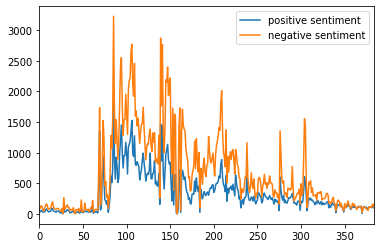

In [104]:
ax = pos_fin[['date', 'positive sentiment']].plot()
neg_fin[['date', 'negative sentiment']].plot(ax=ax)

NameError: name 'positives' is not defined